# Assignment: rasterio

**Few Important Things:**
 - Save this file as geo4_emailuser_attempt_assignment (e.g. geo4_mmann1123_attempt_rasterio)
 - If you can't figure something out, that is ok, do your best and share it




## Task A (5 points)
Refer back to the lecture on affine transforms - you will need it. 

Use `Affine.translation` and `Affine.scale` to create a affine transformation matrix that takes the x and y resolution, an coordinates of the center of the upper left cell as arguments.

To test it, we will execute `transfomer` below, when run it should provide a affine transform matrix that meets these criteria:
- *Center* the upper left hand corner pixel at exactly over 38.907192 degree north and 77.036873 degrees west of the prime meridan (assuming WGS 1984 projection), this is the center of Washington DC
- Have a resolution of 0.5 degree 



In [1]:
from rasterio.transform import Affine
import geopandas as gpd
#def transformer(x_res, y_res, x0,y0):
   # return(0)
   
def transformer(x_res, y_res, x0, y0):
    return Affine.translation(x0- x_res / 2, y0 - y_res /2)

    
# YOUR CODE HERE
    
#raise NotImplementedError()

In [2]:
dc_transform = transformer(x_res = 0.5, y_res = -0.5, x0 = -77.036873, y0=38.907192)
print(type(dc_transform))

<class 'affine.Affine'>


In [3]:
assert len(dc_transform) == 9
assert type(dc_transform) == Affine

In [4]:
"""Run the following hidden tests: you should get no errors"""

'Run the following hidden tests: you should get no errors'

In [5]:
"""Run the following hidden tests: you should get no errors"""

'Run the following hidden tests: you should get no errors'

## Task B (5 points)

Create a function called `RGB_Diagnostic` that generates the following plots, and accepts only one argument, `fp`, the file path to a raster image in RGB band order. In this case use the image `rgb_20160101.tif` from our lecture data.  Make sure to use `with` to ensure the image is properly closed at the end of execution. *Hint:* it is ok to initialize more than one subplot group. 

For instance you could create two subplots `ax1, ax2` with a shared y xaxis values (ie. `sharey=True` 

```python
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 4), sharey=True)
show((data, band), ax=ax1) 
show((data, band), ax=ax2)
```
and follow that with another set of subplots 
```python
fig, ax3 = plt.subplots(ncols=1, nrows=1, figsize=(10, 4) )
show((data, band), ax=ax3)
```

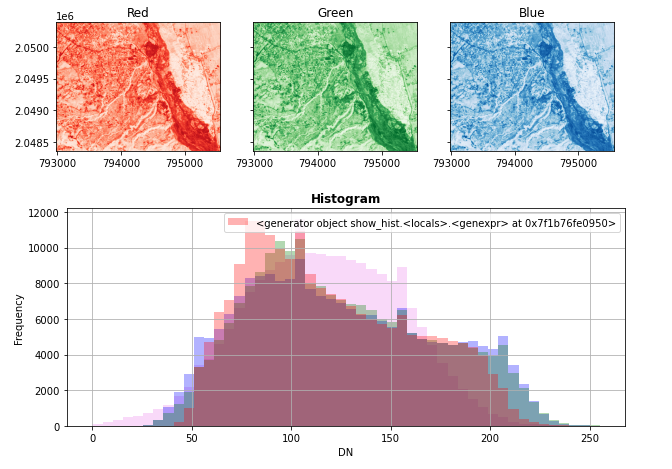

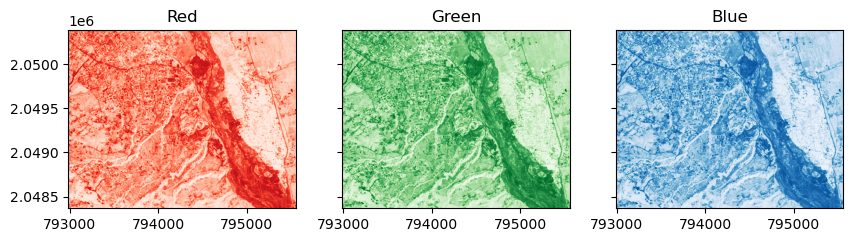

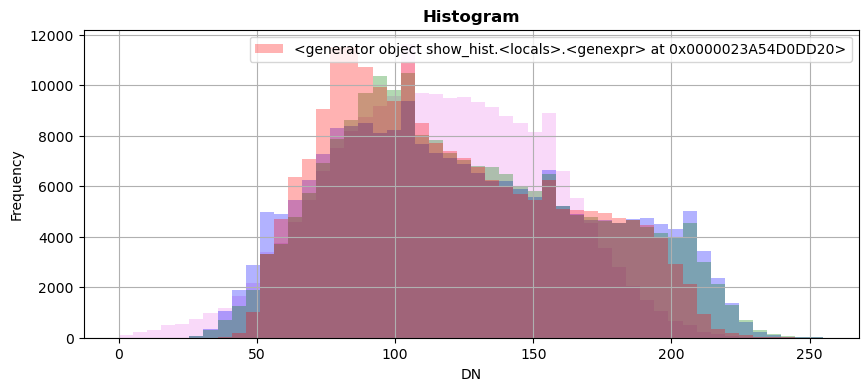

In [6]:
import rasterio
from rasterio.plot import show_hist
from rasterio.plot import show
import matplotlib.pyplot as plt
    

def RGB_Diagnostic(fp):
    with rasterio.open(fp, mode= 'r') as src:
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize= (10,4), sharey = True)

        show((src,1), cmap='Reds', ax=ax1)
        show((src,2), cmap= 'Greens', ax= ax2)
        show((src, 3), cmap= 'Blues', ax=ax3)

        ax1.set_title('Red')
        ax2.set_title('Green')
        ax3.set_title('Blue')

        fig, (ax4) = plt.subplots(ncols= 1, nrows=1, figsize=(10,4))

        show_hist(src, bins= 50, lw=0.0, stacked= False, alpha=0.3, histtype= 'stepfilled', title= 'Histogram', ax=ax4)
    
# YOUR CODE HERE
#raise NotImplementedError()
rgb= r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Documents\geo1_data (1)\geo1_data\data7\data_7_share\rgb_20160101.tif'  # do not edit path, please move file if necessary
"""Run the following, make sure your file is in the right location, you should get no errors"""
RGB_Diagnostic(rgb)

## Task C (5 points)

For this task create a function called `NDVI` that takes as an argument a list of paths to tifs in the following band order, `[red_band.tif, NIR_band.tif]` using the Landsat 8 images from last class. Use these band values to calculate the Normalized Difference Vegetation indice, and return it as a numpy array to the user. Remember that these values need to be scaled by 0.0000275 to get surface reflectance values *before* you calculate NDVI.

Use the following equation to calculate NDVI, where NIR is near infrared:

$$NDVI = \frac{NIR - Red}{NIR+ Red}$$

$\newline$

|   | Use | Resolution |
| --     | --  |  --        |

| Bands         | Use | Resolution |
|--------------|:-----:|-----------:|
| Band 1 |  Costal/Aerosol |     30m |
| Band 2 |  Blue |     30m |
| Band 3 |  Green |     30m |
| Band 4 |  Red |     30m |
| Band 5 |  Near Infrared |     30m |


Use the files `2021-07-16-00:00_2021-07-16-23:59_Landsat_8_L2_B04.tif` and `2021-07-16-00:00_2021-07-16-23:59_Landsat_8_L2_B05.tif` from our lecture for this exercise.


<!-- ![landsatbands.png](attachment:landsatbands.png) -->

In [7]:
from glob import glob
import numpy as np


def NDVI(band_list):
        return(0)

band_list = [r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Documents\geo1_data (1)\geo1_data\data7\data_7_share\EO_Browser_images\2021-07-16-00_00_2021-07-16-23_59_Landsat_8_L2_B04.tif',r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Documents\geo1_data (1)\geo1_data\data7\data_7_share\EO_Browser_images\2021-07-16-00_00_2021-07-16-23_59_Landsat_8_L2_B02.tif']

def NDVI(band_list):
    scaler = 0.0000275 
    # Read metadata of first file
    with rasterio.open(band_list[1]) as bandNIR:
        nir = bandNIR.read(1)*scaler
    with rasterio.open(band_list[0]) as bandRED:
        red = bandRED.read(1)*scaler

    ndvi = (nir-red)/(nir+red)
    
    return ndvi
    '''Returns np.ndarray of shape (299, 457)'''
# YOUR CODE HERE

In [8]:
ndvi_values = NDVI(band_list)

C:\Users\kaylaaburida_gwu\AppData\Local\Temp\2\ipykernel_10208\2340765187.py:18: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir-red)/(nir+red)


In [9]:
"""Run the following: you should get no errors"""
try:
    assert type(ndvi_values) == np.ndarray
except AssertionError:
    print('you need to return a numpy array of values that you .read() in')
    
try:
    assert ndvi_values.shape == (299, 457)
except AssertionError:
    print('Your returned array is the wrong shape')
try:
    assert np.array_equal(np.round(ndvi_values[1,20:25],3),np.array([0.854, 0.847, 0.648, 0.207, 0.196]))
except AssertionError:
    print('The values are not correct, check that you didnt mix up red and NIR bands, and that you applied the scaler to the values')

The values are not correct, check that you didnt mix up red and NIR bands, and that you applied the scaler to the values


In [10]:
"""Run the following hidden tests: you should get no errors"""



'Run the following hidden tests: you should get no errors'

## Task D (5 points)

Update the function `NDVI` above to write out NDVI values to disk and save the file as `'./output/NDVI.tif'`. Make sure its:
- accepts 2 arguments, 
    - (1) `band_list` file list ordered [red,nir], 
    - (2) `out_file` a string file path for your ouput file location/name
- data type is 32 bit float,
- the raster has 1 band 299 rows and 457 columns
- the projection is epsg code 4327
- values are scaled by multiplying them by 0.0000275 (assuming landsat)

Use the files `2021-07-16-00:00_2021-07-16-23:59_Landsat_8_L2_B04.tif` and `2021-07-16-00:00_2021-07-16-23:59_Landsat_8_L2_B05.tif` from our lecture for this exercise.

In [11]:
import os 
os.getcwd()

'\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Documents\\final hs'

In [12]:
#! mkdir -p output 
# alternatively for windows this should work
# if not exist "output" md "output"

# keep these file locations 
#out_file='./output/NDVI.tif'
#band_list =['./2021-07-16-00:00_2021-07-16-23:59_Landsat_8_L2_B?????.tif',
                   # './2021-07-16-00:00_2021-07-16-23:59_Landsat_8_L2_B?????.tif']

def NDVI(band_list,out_file):
     return(0)


out_file='./output/NDVI.tif'
band_list =[r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Documents\geo1_data (1)\geo1_data\data7\data_7_share\EO_Browser_images\2021-07-16-00_00_2021-07-16-23_59_Landsat_8_L2_B04.tif',
                    r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Documents\geo1_data (1)\geo1_data\data7\data_7_share\EO_Browser_images\2021-07-16-00_00_2021-07-16-23_59_Landsat_8_L2_B05.tif']

def NDVI(band_list, out_file):
    scaler = 0.0000275 
    with rasterio.open(band_list[1]) as bandNIR:
        nir = bandNIR.read(1)*scaler
    with rasterio.open(band_list[0]) as bandRED:
        red = bandRED.read(1)*scaler
        out_profile = bandRED.profile.copy()
        
    ndvi = (nir-red)/(nir+red)
    
    out_profile.update({'count':1,
                       'dtype':'float32'})
    with rasterio.open(out_file, 
                       'w', **out_profile) as dst:  
            dst.write(ndvi, 1)

# YOUR CODE HERE

In [13]:
# execute the function
NDVI(band_list,out_file)

# read the data back in 
ndvi_array = rasterio.open(out_file).read()

C:\Users\kaylaaburida_gwu\AppData\Local\Temp\2\ipykernel_10208\3522945794.py:26: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir-red)/(nir+red)


In [14]:
"""Run the following: you should get no errors"""
try:
    assert type(ndvi_array) == np.ndarray
except AssertionError:
    print('output should be a numpy ndarray because it has been .read()')
try:
    assert ndvi_array.shape == (1, 299, 457)
except AssertionError:
    print('the shape should be (1, 299, 457), because we need to update the profile band number to 1')


In [15]:
"""Run the following hidden tests: you should get no errors"""
ndvi_array = rasterio.open(out_file).read()


## Task E (5 Points)
In this task use what you learned about reading in arrays of data (e.g. in NDVI above) to calcuate the tolal precipitation in Ethiopia for 2010.  Your boss sent you a folder of files that hold total precipitation (mm) for every +-15 days (called a decad) in band 1. We simply need to read in each one of these files in a for loop, read the band data into an array, and add them all up over the loop. Each file has a similar naming convention `precipitation_yearmonthday_5000m.tif`. 

Hints:
- To do this use `glob` to get a list of all your precipitation files (always make sure you don't accidently grab other files).
- You probably need to start by creating an empty array (of the correct shape) to add the precip values to. This can be done using [numpy.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)

Criteria:
- create a function called `sum_rasters`, 
    - that accepts a `file_list`, and 
    - removes all values of -9999 (missing data)
    - returns an *array* of 
        - shape (254, 223) and 
        - type float64
- Challenge, see if you can create a function that accepts any shape raster. 


In [16]:
from glob import glob
from numpy import int16

# make sure you can use this relative location
file_list = glob(r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Downloads\assignment (1)\data\precipitation_2010*_5000m.tif')
print(file_list)
def sum_rasters(file_list):

    with rasterio.open(file_list[0]) as inner:
        shaper = inner.read(1).shape
    out = np.zeros(shaper)
    print(out)
    for file in file_list:
        with rasterio.open(file) as inner:
            vals = inner.read(1)
            vals[vals==-9999] = 0
            out = out+ vals
            print(out)
    return out

# YOUR CODE HERE
#raise NotImplementedError()

['\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100101_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100116_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100201_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100216_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100301_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100316_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100401_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100416_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Use

In [17]:
# calculate sum of rainfall
ET_precip = sum_rasters(file_list)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.48484907 0.61140943 0.63553292]
 [0.         0.         0.         ... 0.5916549  0.67253625 0.64747202]
 [0.         0.         0.         ... 0.         0.61493695 0.70955122]
 ...
 [5.8521986  6.08177328 6.66937923 ... 0.33883902 0.30947301 0.28557882]
 [6.26803398 7.25460672 6.95065117 ... 0.34079078 0.32172936 0.30244187]
 [6.62050104 7.50041342 7.03767395 ... 0.35733142 0.33448428 0.32792506]]
[[0.         0.         0.         ... 0.61917691 0.88765112 0.93410286]
 [0.         0.         0.         ... 0.86935598 1.03021961 0.9462226 ]
 [0.         0.         0.         ... 0.         0.88195887 1.09535357]
 ...
 [7.44542861 7.75977123 8.23957551 ... 0.40680422 0.38095984 0.34368278]
 [7.9316361  9.31133771 8.76454997 ... 0.37126239 0.36680298 0.34545318]
 [8.10159254 9.15784132 8.6144

[[  4.83387617   2.87769036   2.38242833 ...  12.32141268  13.63823586
   15.27159657]
 [  5.13682006   4.67399826   4.57326268 ...  13.09824385  14.05119061
   15.0989152 ]
 [  4.57485189   4.3161859    4.95323623 ...   0.          14.64449641
   16.12085567]
 ...
 [209.39238167 206.1135596  195.49202693 ...  94.11097294  93.7270991
   98.19642431]
 [214.4427135  218.52817369 208.75065303 ... 103.08320409 105.73279246
  112.68830615]
 [217.26810598 222.28022301 225.39856124 ... 111.13962266 113.40064933
  116.49193241]]
[[ 27.4546285   24.93371873  24.68589322 ...  18.57493984  19.41600209
   21.73084177]
 [ 29.77995704  30.75115623  29.64492558 ...  18.1311623   18.56182694
   20.93717442]
 [ 31.64475049  30.48156829  30.37855018 ...   0.          18.90193507
   21.13017593]
 ...
 [230.14775085 227.75399005 216.08631098 ...  94.11097294  93.7270991
   98.75586594]
 [235.80885005 241.41707444 231.26040912 ... 104.17438132 107.0285705
  114.19933372]
 [237.63302755 243.51438248 246.177

In [18]:
"""Run the following: you should get no errors"""
try:
    assert type(ET_precip) == np.ndarray
except AssertionError:
    print("The output shoudl be an ndarray")
try:
    assert ET_precip.shape == (254, 223)    
except AssertionError:
    print("The shape of your output should match the shape of the input rasters")


In [19]:
"""Run the following: you should get no errors"""
try:
    assert np.array_equal(np.round(ET_precip[50,1:4],3), np.array([131.978, 132.09 , 131.105]))
except AssertionError:
    print('make sure you removed missing values and properly summed the values')

In [20]:
"""Challenge: Accept tifs of different shapes"""




'Challenge: Accept tifs of different shapes'

## Task F (5 Points)
**(3 points)**
In this task we will create a function that quickly and easily reprojects any raster. Create a function called `project_raster` that:

- Takes three arguments
     - (1) `in_raster` input file path
     - (2) `out_raster` output path and name
     - (3) `out_crs` set epsg code
- By default uses the resampling method of `nearest` 

**Bonus (2 point)**
- Add an argument called `resampling` where you 
    - Can choose the resampling method, but *uses nearest by default*  [(default args tutorial)](https://www.geeksforgeeks.org/default-arguments-in-python/)
        - Allow for nearest, bilinear, cubic [see choices here](https://rasterio.readthedocs.io/en/latest/api/rasterio.enums.html#rasterio.enums.Resampling).  
    - Consider using a dictionary maping text to the function, for instance {'cubic':Resampling.cubic,'otheroption':Resampling.otheroption}




In [21]:
from rasterio.warp import reproject, Resampling, calculate_default_transform

in_raster = r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Documents\geo1_data (1)\geo1_data\data7\data_7_share\rgb_20160101.tif'
out_raster = './output/rgb_20160101_WGS.tif'
out_crs = 'epsg:4326'

def project_raster(in_raster, out_raster, out_crs, resampling='nearest'):
    dst_crs = out_crs

    with rasterio.open(in_raster) as src:
        src_transform = src.transform

        # calculate the output transform matrix
        dst_transform, dst_width, dst_height = calculate_default_transform(
            src.crs,     
            dst_crs,    
            src.width,   
            src.height,  
            *src.bounds, )
        # set properties for output
        dst_kwargs = src.meta.copy()
        
        dst_kwargs.update({"crs": dst_crs,
                           "transform": dst_transform,
                           "width": dst_width,
                           "height": dst_height,
                           "nodata": 0})
        
        resample = {'cubic':Resampling.cubic,'nearest':Resampling.nearest,'bilinear':Resampling.bilinear}
        
        
        with rasterio.open(out_raster, "w", **dst_kwargs) as dst:
            # iterate through bands and write using reproject function
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=dst_transform,
                    dst_crs=dst_crs,
                    resampling= resample[resampling])
# YOUR CODE HERE
#raise NotImplementedError()

In [22]:
project_raster(in_raster, 
               out_raster = r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Downloads\assignment (1)\rgb_20160101_WGS.tif', 
               out_crs= 'epsg:4326')

In [23]:
"""Run the following: you should get no errors"""
from numpy import uint8
from rasterio.crs import CRS
out_file = './output/rgb_20160101_WGS.tif'

proj_test = rasterio.open(out_file)

try:
    assert proj_test.shape == (399, 531)
except AssertionError:
    print('The output shape should be (399, 531) check your destination height and width generated with default transform')

try:
    assert proj_test.crs == CRS.from_epsg(4326)
except AssertionError:
    print('The output crs should be 4326')
try:
    assert np.array_equal( [round(x, 7) for x in list(proj_test.res)],[4.65e-05, 4.65e-05] )
except AssertionError:
    print('The resolustion isnt correct, check your default transform')
try:
    assert np.array_equal(proj_test.read(1)[22,100:105].tolist(), 
                       [158,156, 174, 143,  98] )
except AssertionError:
    print('The cell values are off... are you doing nearest neighbor resampling?')
    

In [24]:
"""Run the following: you should get no errors"""
project_raster(in_raster, 
               out_raster = r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Downloads\assignment (1)\rgb_20160101_WGS.tif', 
               out_crs= 'EPSG:4326',
               resampling='cubic')

proj_test = rasterio.open(out_file)

try:
    assert proj_test.shape == (399, 531)
except AssertionError:
    print('The output shape should be (399, 531) check your destination height and width generated with default transform')

try:
    assert np.array_equal( [round(x, 7) for x in list(proj_test.res)],[4.65e-05, 4.65e-05] )
except AssertionError:
    print('The resolustion isnt correct, check your default transform')
try:
    assert np.array_equal(proj_test.read(1)[22,0:5].tolist(), 
                      [0,0,0,0,0])
except AssertionError:
    print('The cell values are off... are you doing nearest neighbor resampling?')
    
try:
    assert proj_test.crs == CRS.from_epsg(4326)
except AssertionError:
    print('The output crs should be 4326')

## Task G (5 Points)

In this task we look at how to summarize raster values by polygon boundaries. Create a function called `single_zonal_stats` that: 

- Takes three arguments
     - (1) `in_raster` file path to single raster
     - (2) `in_zones` input path to shapfile 
     - (3) `missing_value` value to replace with np.NaN before calculations
     - (4)`agg_method` mean, median, mode etc. 
- Returns
    - (1) A dataframe containing:
        - The orginal attribute values from `in_zones` 
        - The zonal statistic values for each `in_raster`
            - with the new column name being the date of the image, obtained from the file name (e.g. for `rgb_20160101_5000m.tif` the column holding the zonal statistic values should be called `20160101`)
           

**Case:**
To test this, use the Ethiopian region shapefile called `./data/ETH_adm1.shp`. Use these regions to calcuate the mean precipitation value **for each region** for the file (`precipitation_20100101_5000m.tif`) in the data folder. Each cell should hold the mean precip value in mm for each of Ethiopia's regions. 
 
**Your output should look like:**

|ID	|ISO |	ID_1 |	NAME_1 |	geometry |	20100101 |
|--|------------|-----------|------------|--------------|-----------| 
|0 |	ETH |	1 |	Addis Ababa |	POLYGON ((38.77191 9.09565, )) |	1.016141|
|1 |	ETH |	2 |	Afar |	POLYGON ((40.15959 14.54282, )) |	2.342747|
|2 |	ETH |	3 |	Amhara |	POLYGON ((36.47115 13.73764, )) |	1.073521|
|3 |	... |	... |	... |	 ... |	...|

**Hint:**
- Remember `rasterstat` doesn't need you to call rasterio, just pass the raster path. For some examples see [help docs](https://pythonhosted.org/rasterstats/manual.html#zonal-statistics). Read additional function arguments for `zonal_stats` confusingly stored under the name [gen_zonal_stats](https://pythonhosted.org/rasterstats/rasterstats.html#rasterstats.gen_zonal_stats)
- You might consider using `pd.concat` or `pd.merge` to merge the zonal data back into the `in_zones` dataframe [example](https://stackoverflow.com/questions/32444138/concatenate-a-list-of-pandas-dataframes-together).
- To create your column names, it might be helpful to extract any numbers from `in_raster` file path. You can use the following trick to extract numeric values from strings. 

```python
import re

re.findall(r'[0-9]+','rgb_20160101_5000m.tif') 
#returns
['20160101','5000']
# or
re.findall(r'[0-9]+','rgb_20160101_5000m.tif')[0] 
#returns
['20160101']
```
 

In [25]:
# install rasterstats 
# ! pip install rasterstats

from rasterstats import zonal_stats
import geopandas as gpd
import pandas as pd
import re

# please make sure your data is in this location
in_raster = r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Downloads\assignment (1)\data\precipitation_20100101_5000m.tif'



def single_zonal_stats(in_raster, in_zones, missing_value=-9999, agg_method='mean'):
    
    # get file date 
    name = re.findall(r'[0-9]+',in_raster)[0] 

    zone =  zonal_stats(in_zones, in_raster, stats = agg_method, nodata=missing_value)
    data =  pd.DataFrame(zone)
    data.columns = [name] 
    zones = gpd.read_file(in_zones)
    
    return pd.concat([zones,data], axis=1)
# YOUR CODE HERE
#raise NotImplementedError()

In [26]:
ET_ppt20100101 = single_zonal_stats(in_raster, in_zones=r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Downloads\assignment (1)\data\ETH_adm1.shp',missing_value=-9999, agg_method='mean')            
ET_ppt20100101

,ISO,ID_1,NAME_1,geometry,1
0,ETH,1,Addis Ababa,"POLYGON ((38.77191 9.09565, 38.77332 9.09516, ...",1.016141
1,ETH,2,Afar,"POLYGON ((40.15959 14.54282, 40.18436 14.53445...",2.342747
2,ETH,3,Amhara,"POLYGON ((36.47115 13.73764, 36.47418 13.73728...",1.073521
3,ETH,4,Benshangul-Gumaz,"MULTIPOLYGON (((36.29256 8.99504, 36.29414 8.9...",0.152103
4,ETH,5,Dire Dawa,"POLYGON ((42.07681 9.47495, 42.07052 9.47646, ...",0.844261
5,ETH,6,Gambela Peoples,"POLYGON ((34.35720 8.56085, 34.37307 8.54263, ...",0.796355
6,ETH,7,Harari People,"POLYGON ((42.06332 9.22826, 42.06413 9.22960, ...",1.011100
7,ETH,8,Oromia,"POLYGON ((38.71942 10.38668, 38.72070 10.38660...",3.826451
8,ETH,9,Somali,"POLYGON ((42.65579 11.07768, 42.65695 11.07740...",0.300771
9,ETH,10,"Southern Nations, Nationalities and Peoples","POLYGON ((38.58021 8.44705, 38.58693 8.43556, ...",13.512376


In [27]:
try:
    assert ET_ppt20100101.columns.to_list() == ['ISO', 'ID_1', 'NAME_1', 'geometry', '20100101']
except AssertionError:
    print("check your column names make sure they are generated as ['ISO', 'ID_1', 'NAME_1', 'geometry', '20100101']")
    
try:
    assert isinstance(ET_ppt20100101, gpd.GeoDataFrame)
except AssertionError:
    print("The output should be a geodataframe")
try:
    assert ET_ppt20100101.shape ==(11, 5)
except AssertionError:
    print("There are 11 regions in Ethiopia and there should be five columns of data including geometry")

check your column names make sure they are generated as ['ISO', 'ID_1', 'NAME_1', 'geometry', '20100101']


## Task H (3 Points)

In this task we look at how to summarize raster values by polygon boundaries. Create a function called `multi_zonal_stats` that: 

- Takes three arguments
     - (1) `in_rasters` input raster file path
     - (2) `in_zones` input path to shapfile 
     - (3) `missing_value` value to replace with np.NaN before calculations
     - (4)`agg_method` mean, median, mode etc. 
- Returns
    - (1) A dataframe containing the zonal statistic values for each `in_rasters`
        - with each column name being the date of the image obtained from the file name
        - each row being the feature id (0-10) of `in_zones`

**Case:**
To test this use the Ethiopian region shapefile called `./data/ETH_adm1.shp`. Use these regions to calcuate the mean precip value **by region** for each precipiation raster (`precipitation_*_5000m.tif`) using the .tif from earilier. Each row should hold the mean precip value in mm for each of Ethiopia's regions across all time periods. 

In this case your output should look like:

|          | 20100101     | 20100116| .... | 20101201 | 20101216 |
|--------------|-----------|------------|--------------|-----------|------------|
| 0 | 1.016141      | 1.625443      | .... | 1.312358  | 1.385683 |
| 1 |  2.342747     |   1.737838    | .... |  0.950735  | 0.854197 |
| 2 |    1.073521   |   1.587009    | .... |   1.207282 | 1.022256 |
| 3 |  ....         |   ....        | .... |  ....      | ....     |
| 8 |  0.300771      |  0.225488    | .... |  0.279895   | 0.245578 |
| 9 |    13.512376   |   5.070415   | .... |  3.054759  |  1.860390|
| 10 |    1.574876   |   0.846256   | .... |  0.762118  |  0.497763 |


**Hint:**
- You can execute your function from the previous question to answer this one
- Use `sorted(glob('./some_name_*.tif')` to get your files in accending order
- Remember `rasterstat` doesn't need you to call rasterio, just pass the raster path. For some examples see [help docs](https://pythonhosted.org/rasterstats/manual.html#zonal-statistics). Read additional function arguments for `zonal_stats` confusingly stored under the name [gen_zonal_stats](https://pythonhosted.org/rasterstats/rasterstats.html#rasterstats.gen_zonal_stats)
- You might consider collecting the output from `rasterstat` into a list and then use `pd.concat` to collapse all these dataframes into a single dataframe [example](https://stackoverflow.com/questions/32444138/concatenate-a-list-of-pandas-dataframes-together).
- It might be helpful to create a list of the dates of your files in the order of `in_rasters`. You can use the following trick to extract the first numbers from each item in the list. 

```python
import re

re.findall(r'[0-9]+','rgb_20160101_5000m.tif') 
#returns
['20160101','5000']
# or
re.findall(r'[0-9]+','rgb_20160101_5000m.tif')[0] 
#returns
['20160101']

# or
test_string =['rgb_20160101_WGS.tif','rgb_20180201_WGS.tif']
[re.findall(r'[0-9]+',items)[0] for items in test_string ]

#returns
['20160101', '20180201']

```

In [28]:
# Install rasterstats if not available
#! pip install rasterstats

In [29]:
from rasterstats import zonal_stats
import pandas as pd
import re

# your input rasters and zones should be in ./data folder
in_rasters = sorted(glob(r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Downloads\assignment (1)\data\precipitation_*_5000m.tif'))
#print (in_rasters)

def multi_zonal_stats(in_rasters, in_zones, missing_value=-9999, agg_method='mean'):
    data = gpd.read_file(in_zones)
    out_list = []

    for raster in in_rasters:
            #print(raster)
            column = re.findall(r'[0-9]+',raster)[1] 
            print(column)

            precip = zonal_stats(vectors = data, raster = raster, nodata= missing_value, stats=agg_method, all_touched =False )
    
            precip_df = pd.DataFrame(precip)
            precip_df.columns = [column]

            out_list.append(precip_df)
   
    
    final_df = pd.concat(out_list, axis=1)
    #final_df.columns = raster_names
    
    return final_df

        


# YOUR CODE HERE
#raise NotImplementedError()


In [30]:
ET_ppt2010 = multi_zonal_stats(in_rasters, in_zones=r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Downloads\assignment (1)\data\ETH_adm1.shp',missing_value=-9999, agg_method='mean')            
ET_ppt2010

20100101
20100116
20100201
20100216
20100301
20100316
20100401
20100416
20100501
20100516
20100601
20100616
20100701
20100716
20100801
20100816
20100901
20100916
20101001
20101016
20101101
20101116
20101201
20101216


,20100101,20100116,20100201,20100216,20100301,20100316,20100401,20100416,20100501,20100516,...,20100801,20100816,20100901,20100916,20101001,20101016,20101101,20101116,20101201,20101216
0,1.016141,1.625443,2.698635,4.893972,28.012314,12.295992,6.664008,36.000494,19.849870,11.942694,...,9.277330,32.920117,38.315637,39.992017,3.400603,1.482763,1.638526,1.390365,1.312358,1.385683
1,2.342747,1.737838,1.242294,1.415420,11.482352,6.381031,2.631693,4.110899,11.012068,1.317191,...,11.432036,14.954454,8.692430,7.782155,1.202395,0.316882,0.838346,1.231843,0.950735,0.854197
2,1.073521,1.587009,1.416653,2.281297,4.889017,6.477322,5.081696,5.932699,27.993877,7.090943,...,39.881343,55.803384,31.615116,20.930825,11.139762,5.384822,1.314369,1.403196,1.207282,1.022256
3,0.152103,0.158424,0.257361,0.388211,0.497528,0.572773,2.473727,3.063955,46.776177,23.527505,...,24.520002,36.893626,37.177144,19.692204,21.190747,18.430103,3.717975,1.929678,0.687847,0.095560
4,0.844261,1.262292,2.171601,3.610951,72.056451,33.398888,17.067923,31.381955,9.022173,11.487736,...,6.273606,22.111144,16.814095,59.002658,4.354731,1.763800,1.466292,1.539305,1.276983,1.183753
5,0.796355,1.649104,1.202391,2.375632,4.269200,3.394298,4.758593,6.263101,27.967417,23.215942,...,13.174854,27.559366,11.438123,12.409650,9.566052,32.786991,13.130943,3.202264,2.188427,0.478287
6,1.011100,1.523046,2.549225,4.443321,57.235125,15.956850,9.476892,24.599413,8.992024,31.427822,...,7.745075,18.664784,15.626629,60.220607,5.786435,3.505112,1.819856,1.918504,1.673849,1.452707
7,3.826451,2.538946,2.398708,3.700892,31.579050,18.575793,15.986388,30.990329,32.811661,27.829861,...,9.949751,19.409099,20.290997,20.402162,9.811930,13.571824,3.060499,2.556624,1.456767,1.048732
8,0.300771,0.225488,0.491116,0.777415,10.683617,7.939032,4.997340,6.067801,3.054990,4.268687,...,0.926802,1.180952,1.653313,4.145167,2.579169,2.359028,0.495616,0.630819,0.279895,0.245578
9,13.512376,5.070415,3.925818,8.359155,29.102436,28.569526,20.705529,51.553119,41.907822,41.621952,...,7.934242,20.981010,13.714595,22.900691,10.835336,22.750521,3.300866,2.905379,3.054759,1.860390


In [31]:
try:
    assert ET_ppt2010.columns.to_list() == ['20100101', '20100116', '20100201',
         '20100216', '20100301', '20100316', '20100401',
         '20100416', '20100501', '20100516', '20100601',
         '20100616', '20100701', '20100716', '20100801', '20100816', '20100901',
         '20100916', '20101001', '20101016', '20101101',
         '20101116', '20101201', '20101216']
except AssertionError:
    print("The columns names are not correct. Make sure you are adding all the data, and dropping geometry or other unneeded columns")
try:
    assert ET_ppt2010.shape == (11, 24)
except AssertionError:
    print(f"Your output is shape {ET_ppt2010.shape} and should be (11, 24)")


### Challenge Question (3 Points)

Take your answer from Task H above and augment it in the following ways:

- Create a new function `multi_zonal_stats2`
- Check that the `in_zones` has the same projection as `in_rasters`, if not, reproject `in_zones`. 
- Merge the zonal statistics values back into the original attribute table of `in_zones`
- Add a parameter called `prefix` that accepts a prefix for the zonal stats column names  e.g. `'ppt_'` should create columns called `'ppt_20100101'`
- Add a parameter called `shp_out` that accepts a path and file for a new output shapefile, to avoid limits on column name length let's write a geojson file out by default instead of a shapefile [see here](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html)
- still return your final dataframe to the user as before


In [32]:

from rasterstats import zonal_stats
import pandas as pd
import re

# your input rasters and zones should be in ./data folder
files = sorted(glob(r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Downloads\assignment (1)\data\precipitation_*_5000m.tif'))
raster_names = [re.findall(r'[0-9]+',items)[1] for items in in_rasters ]

def multi_zonal_stats2(in_rasters, in_zones, shp_out,prefix='ppt_', missing_value=-9999, agg_method='mean'):

    with rasterio.open(in_rasters[1]) as band:
                out_profile = band.profile.copy()    
    in_zones_rep = gpd.read_file(in_zones).to_crs(out_profile['crs'])
         
    data = gpd.read_file(in_zones)
    out = []

    for raster in in_rasters:
            column = re.findall(r'[0-9]+',raster)[1] 

            precip = zonal_stats(vectors = data,      
                                raster = raster,
                                nodata= missing_value,
                                stats=agg_method,
                                all_touched =False )
    
            precip_df = pd.DataFrame(precip)
            precip_df.columns = [prefix+column]
            # print(precip_df.head())

            out.append(precip_df)
    
    
    out_df = pd.concat(out, axis=1)
    # out_df.columns = raster_names
    final_df = pd.concat([in_zones_rep, out_df], axis=1)
    final_df.to_file(shp_out,driver='GeoJSON')
    return final_df

in_rasters = files




In [33]:
print(files)

['\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100101_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100116_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100201_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100216_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100301_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100316_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100401_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Users\\kaylaaburida_gwu\\Downloads\\assignment (1)\\data\\precipitation_20100416_5000m.tif', '\\\\apporto.com\\dfs\\GWU\\Use

In [34]:

ET_ppt2010_2 = multi_zonal_stats2(in_rasters, 
                                  in_zones=r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Downloads\assignment (1)\data\ETH_adm1.shp', 
                                  shp_out='./output/ETH_ppt_2010.geojson', 
                                  prefix='ppt_',
                                  missing_value=-9999, 
                                  agg_method='mean')



In [35]:
try:
    assert ET_ppt2010_2.columns.to_list()[0:6] == ['ISO', 'ID_1', 'NAME_1', 'geometry', 'ppt_20100101', 'ppt_20100116']
except AssertionError:
    raise('Check that the names are getting created properly')


In [36]:
# create a new file with different projection
gpd.read_file(r'\\apporto.com\dfs\GWU\Users\kaylaaburida_gwu\Downloads\assignment (1)\data\ETH_adm1.shp').to_crs('epsg:3857').to_file('./output/ET_webmerc.geojson',driver='GeoJSON')

# try zonal stats with a mismatch in projections
try:
    ET_ppt2010_2 = multi_zonal_stats2(in_rasters, 
                                  in_zones='./output/ET_webmerc.geojson', 
                                  shp_out='./output/ETH_ppt_20102.geojson', 
                                  prefix='ppt_',
                                  missing_value=-9999, 
                                  agg_method='mean')
except:
    raise('Your function should reproject your zones to match the rasters!')


TypeError: exceptions must derive from BaseException

In [ ]:
# deletes the output folder don't run until you are completely finished. Then execute all cells to make sure everything works
! rm -r output